In [151]:
#import the useful libraries.
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format


In [143]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [144]:
from xgboost import XGBRegressor

1.The aim of this data science project is to build a predictive model and find out the sales of each product 
at a particular store. Using this model, BigMart will try to understand the properties of products and stores 
which play a key role in increasing sales.

2.Hypothesis Testing-

In [281]:
df=pd.read_csv('C:/Users/ANIKET/Downloads/technocolab MP/9961_14084_bundle_archive/Train.csv')

In [282]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [284]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,"7,060.00","8,523.00","8,523.00","8,523.00","8,523.00"
mean,12.86,0.07,140.99,"1,997.83","2,181.29"
std,4.64,0.05,62.28,8.37,"1,706.50"
min,4.55,0.00,31.29,"1,985.00",33.29
25%,8.77,0.03,93.83,"1,987.00",834.25
50%,12.60,0.05,143.01,"1,999.00","1,794.33"
75%,16.85,0.09,185.64,"2,004.00","3,101.30"
max,21.35,0.33,266.89,"2,009.00","13,086.96"


In [285]:
df.shape

(8523, 12)

Missing value treatment

In [286]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [287]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [288]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [289]:
df['Item_Weight'].mean()

12.857645184136183

In [290]:
df['Item_Weight']. fillna(value=df['Item_Weight']. mean(), inplace=True)
print('Item_Weight')
print(df)

Item_Weight
     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat             0.02   
1              DRC01         5.92          Regular             0.02   
2              FDN15        17.50          Low Fat             0.02   
3              FDX07        19.20          Regular             0.00   
4              NCD19         8.93          Low Fat             0.00   
...              ...          ...              ...              ...   
8518           FDF22         6.87          Low Fat             0.06   
8519           FDS36         8.38          Regular             0.05   
8520           NCJ29        10.60          Low Fat             0.04   
8521           FDN46         7.21          Regular             0.15   
8522           DRG01        14.80          Low Fat             0.04   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy    249.81            OUT049   
1               S

In [291]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

Check the relationship between target variable(sales) and Outlet size to treat missing values

In [292]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


In [293]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode().iloc[0])

In [294]:
df['Item_Weight'].unique()

array([ 9.3       ,  5.92      , 17.5       , 19.2       ,  8.93      ,
       10.395     , 13.65      , 12.85764518, 16.2       , 11.8       ,
       18.5       , 15.1       , 17.6       , 16.35      ,  9.        ,
       13.35      , 18.85      , 14.6       , 13.85      , 13.        ,
        7.645     , 11.65      ,  5.925     , 19.25      , 18.6       ,
       18.7       , 17.85      , 10.        ,  8.85      ,  9.8       ,
       13.6       , 21.35      , 12.15      ,  6.42      , 19.6       ,
       15.85      ,  7.39      , 10.195     ,  9.895     , 10.895     ,
        7.905     ,  9.195     ,  8.365     ,  7.97      , 17.7       ,
       19.35      ,  8.645     , 15.6       , 18.25      ,  7.855     ,
        7.825     ,  8.39      , 12.85      , 19.        ,  5.905     ,
        7.76      , 16.75      , 15.5       ,  6.055     ,  6.305     ,
       20.85      , 20.75      ,  8.895     , 19.7       ,  8.75      ,
       13.3       ,  8.31      , 19.75      , 17.1       , 10.5 

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [296]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [297]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


Outlier detection

In [298]:
df.shape

(8523, 12)

<AxesSubplot:xlabel='Item_Weight'>

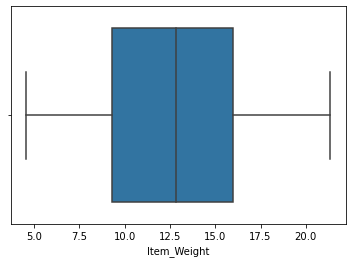

In [299]:
sns.boxplot(x=df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

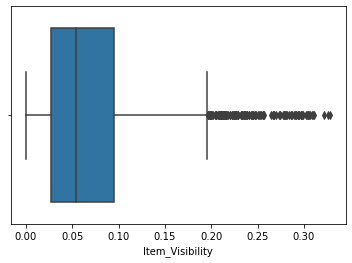

In [300]:
sns.boxplot(x=df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

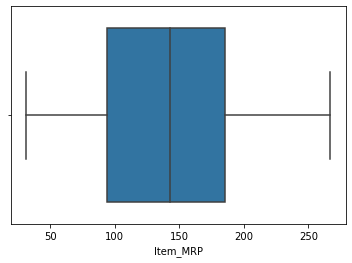

In [301]:
sns.boxplot(x=df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

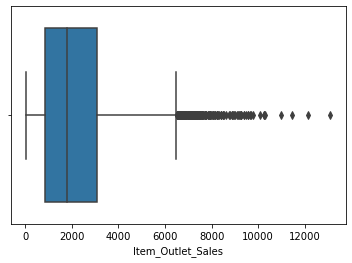

In [302]:
sns.boxplot(x=df['Item_Outlet_Sales'])

outlier treatment

In [303]:
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
df=df[~((df<(q1-1.5*IQR)) | (df>(q1+1.5*IQR))).any(axis=1)]
df.shape

(5432, 12)

In [304]:
df.Item_Fat_Content.unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [305]:
g1 = df.groupby(['Item_Fat_Content']).size().reset_index(name='records')
print(g1)

  Item_Fat_Content  records
0               LF      199
1          Low Fat     3289
2          Regular     1788
3          low fat       79
4              reg       77


In [306]:
df['Item_Fat_Content'].mask(df['Item_Fat_Content'] == 'low fat', 'Low Fat', inplace=True)

In [307]:
df['Item_Fat_Content'].mask(df['Item_Fat_Content'] == 'LF', 'Low Fat', inplace=True)

In [308]:
df['Item_Fat_Content'].mask(df['Item_Fat_Content'] == 'reg', 'Regular', inplace=True)

In [309]:
df.Outlet_Type.unique()

array(['Supermarket Type2', 'Supermarket Type1', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# Exploratory Data Analysis

In [249]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
5,FDP36,10.39,Regular,0.00,Baking Goods,51.40,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.61


## Univariate Analysis

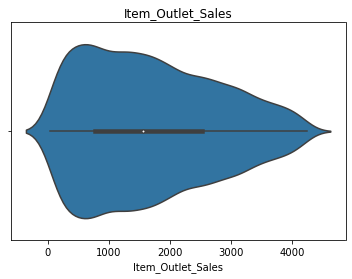

In [250]:
sns.violinplot(df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.show()

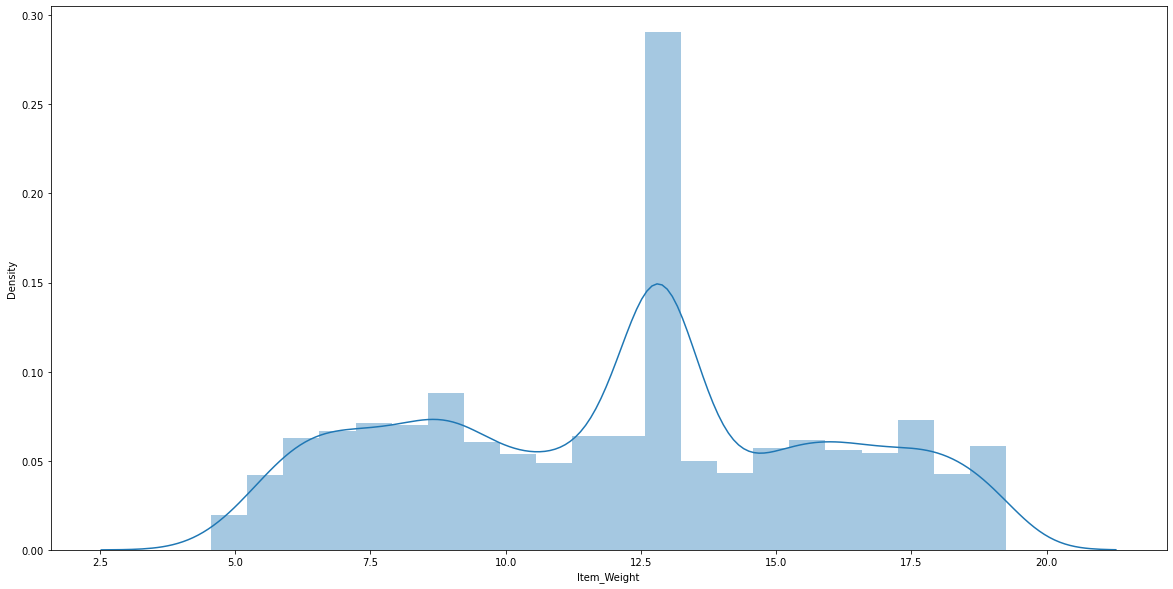

In [251]:
plt.figure(figsize=(20,10))
sns.distplot(df['Item_Weight'])
plt.show()

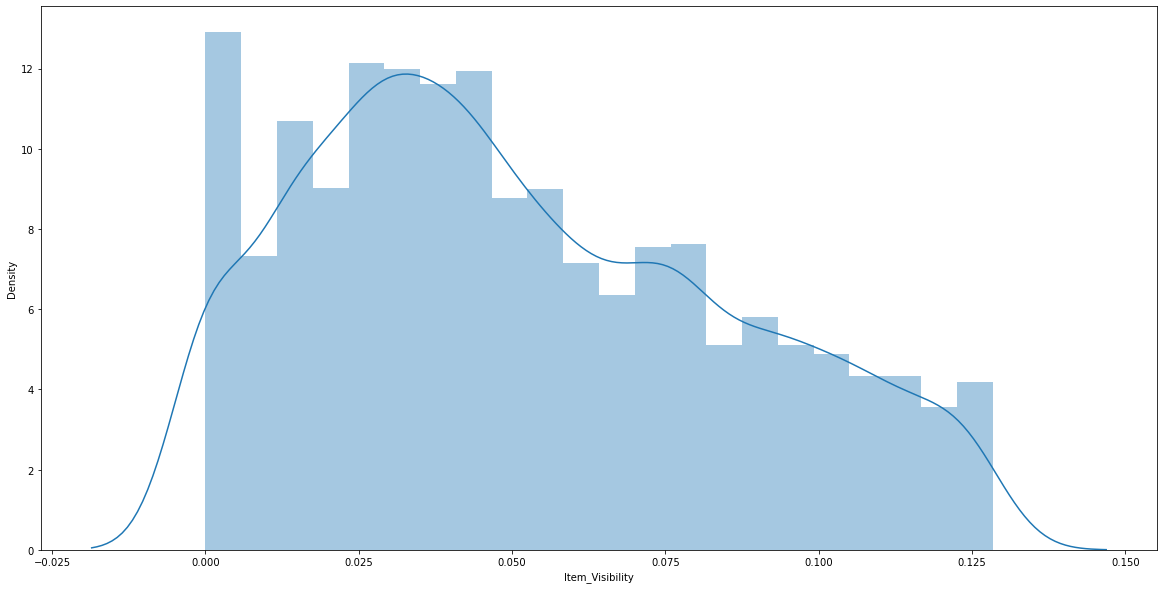

In [252]:
plt.figure(figsize=(20,10))
sns.distplot(df['Item_Visibility'])
plt.show()

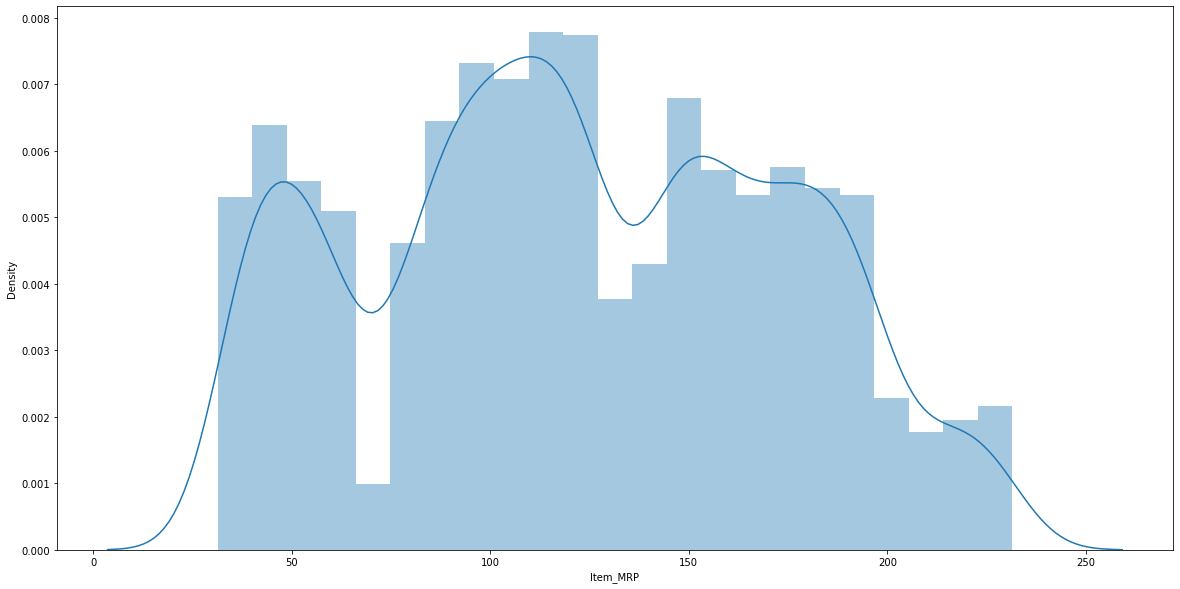

In [253]:
plt.figure(figsize=(20,10))
sns.distplot(df['Item_MRP'])
plt.show()

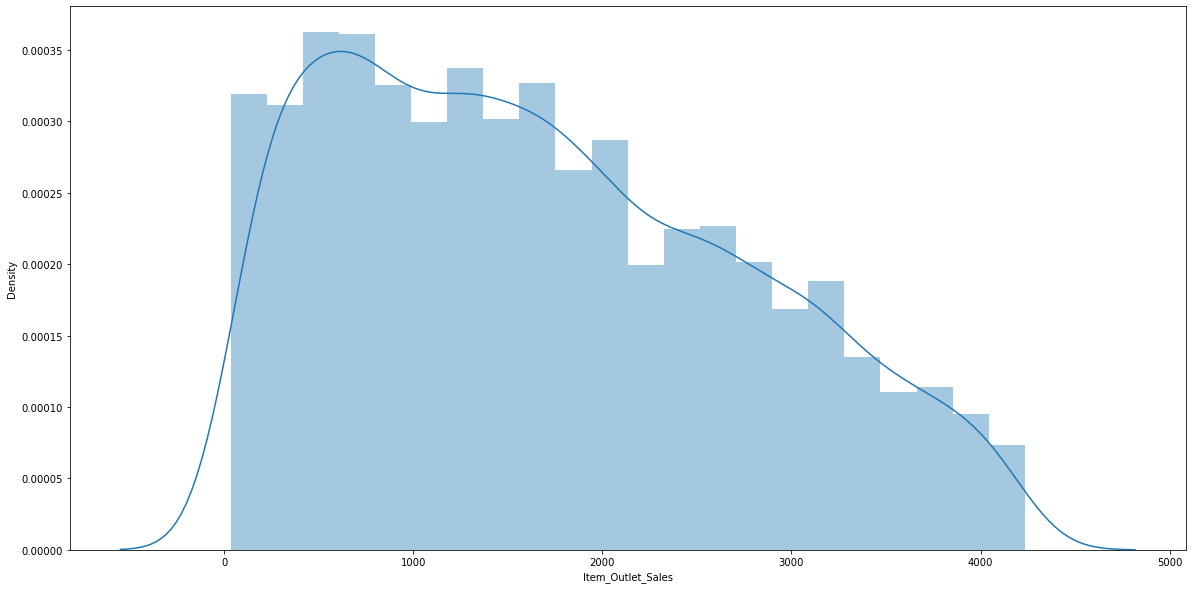

In [254]:
plt.figure(figsize=(20,10))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

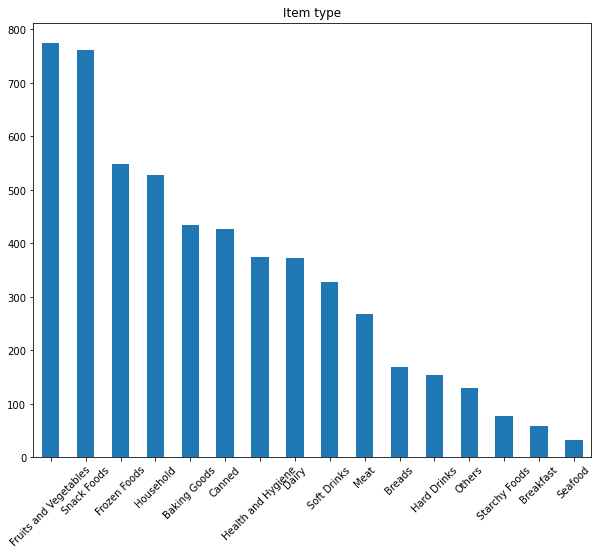

In [255]:
plt.figure(figsize = (10,8))
df['Item_Type'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Item type')
plt.show()

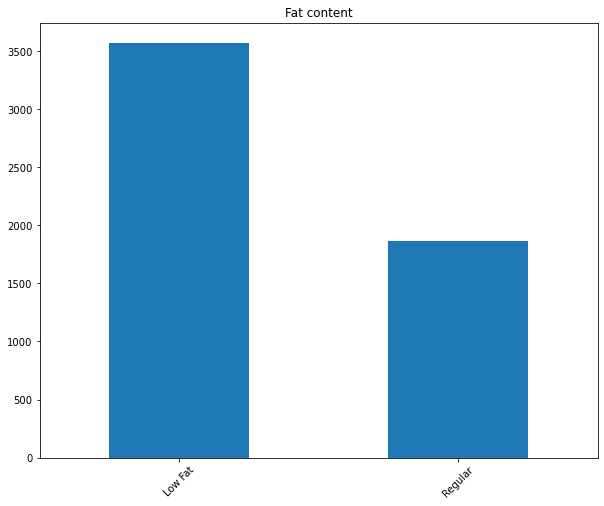

In [256]:
plt.figure(figsize = (10,8))
df['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Fat content')
plt.show()

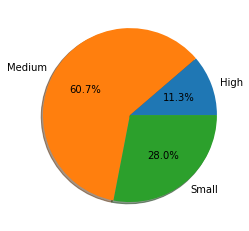

In [257]:
r = df.groupby('Outlet_Size')['Outlet_Size'].count()
plt.pie(r, radius=1,labels=['High','Medium','Small'], autopct='%1.1f%%',shadow=True);

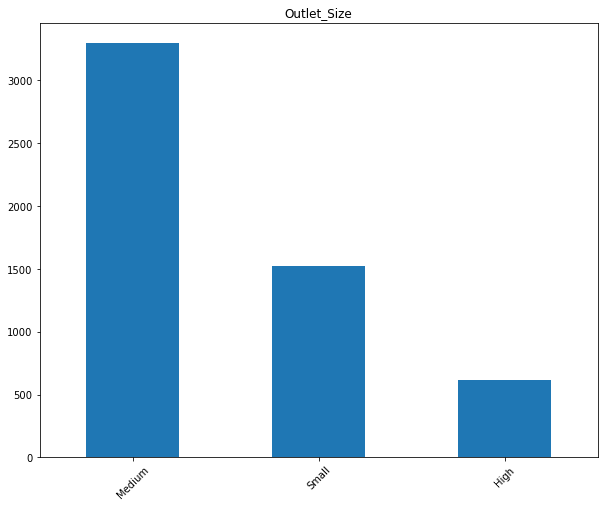

In [258]:
plt.figure(figsize = (10,8))
df['Outlet_Size'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Outlet_Size')
plt.show()

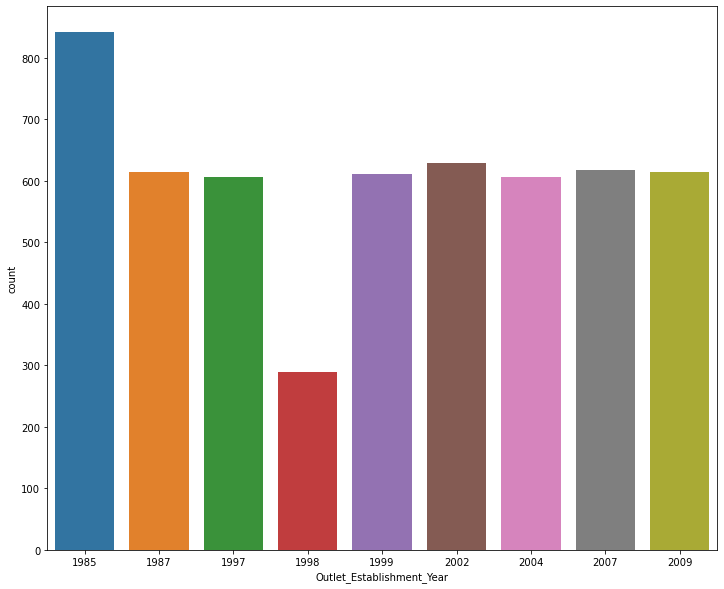

In [259]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Outlet_Establishment_Year'], data=df)
plt.show()

## Bivariate Analysis

In [260]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
5,FDP36,10.39,Regular,0.00,Baking Goods,51.40,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.61


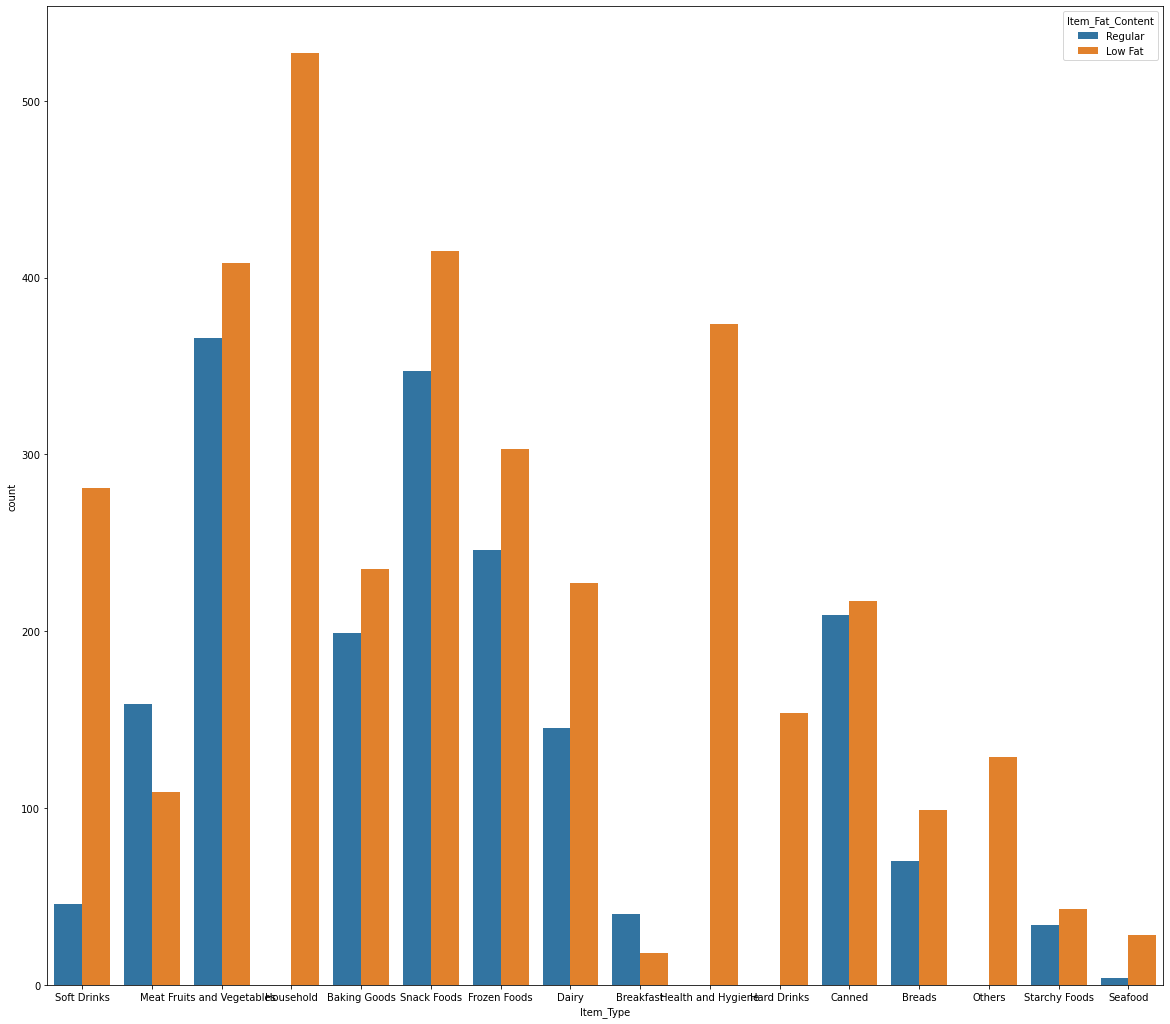

In [261]:
plt.figure(figsize=(20,18))
sns.countplot(x='Item_Type', hue='Item_Fat_Content', data=df);

In [262]:

crosstb1 = pd.crosstab(df.Item_Type, df.Item_Fat_Content)
crosstb1

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,235,199
Breads,99,70
Breakfast,18,40
Canned,217,209
Dairy,227,145
Frozen Foods,303,246
Fruits and Vegetables,408,366
Hard Drinks,154,0
Health and Hygiene,374,0


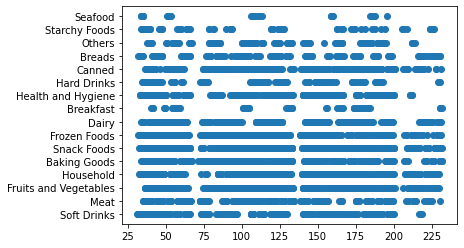

In [263]:
plt.scatter(df["Item_MRP"], df["Item_Type"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Type'>

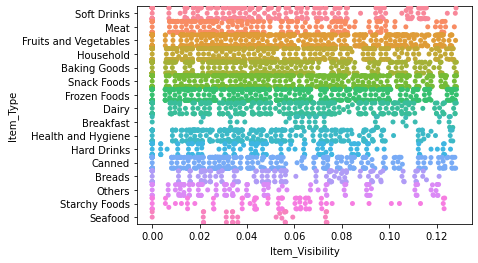

In [264]:
sns.swarmplot(x=df["Item_Visibility"], y=df["Item_Type"], data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

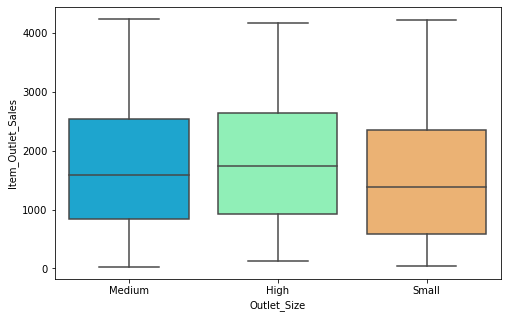

In [265]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df, palette='rainbow')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Visibility'>

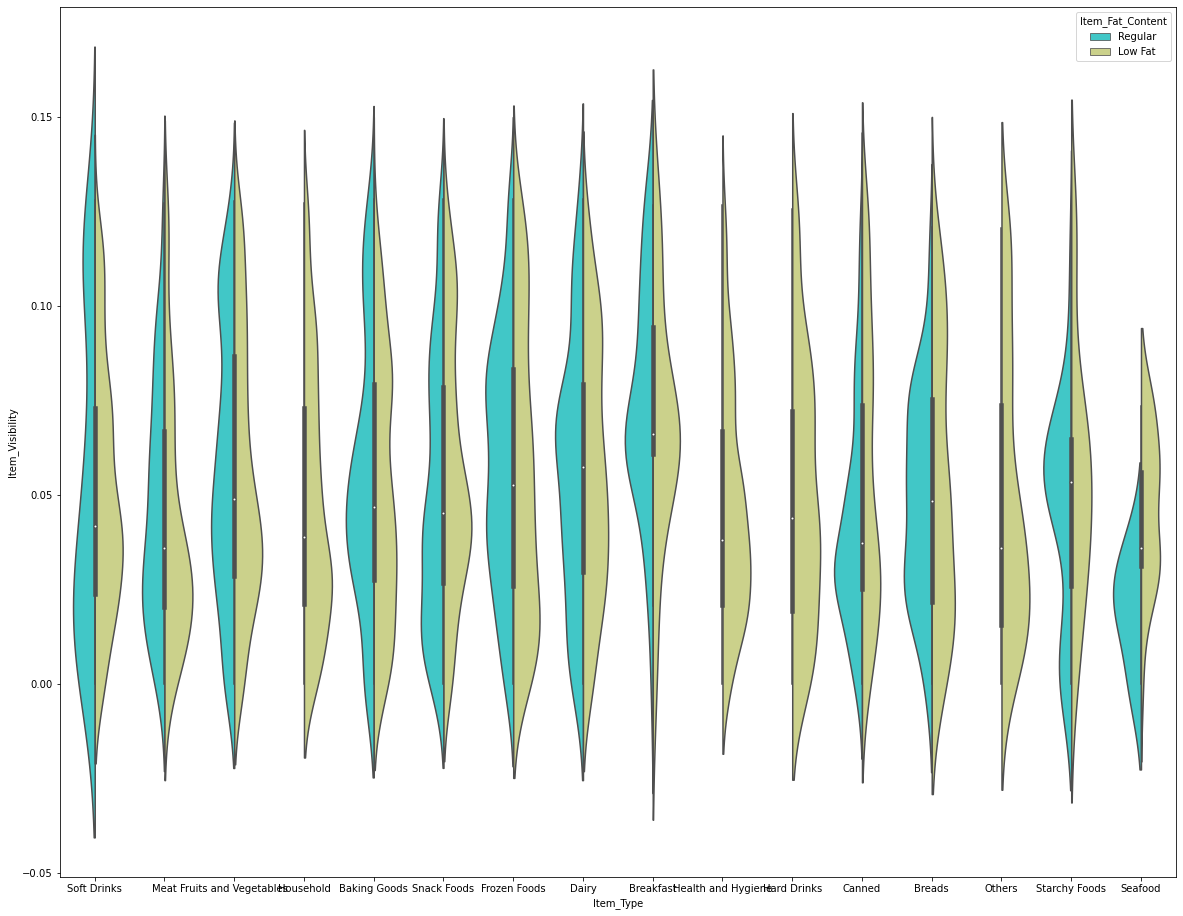

In [266]:
plt.figure(figsize=(20,16))
sns.violinplot(x="Item_Type",y="Item_Visibility",data=df, hue='Item_Fat_Content', palette='rainbow',split='True')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

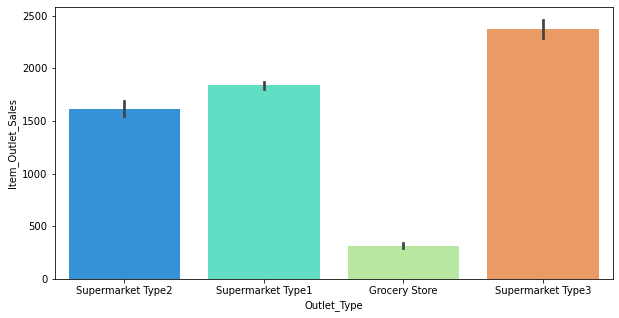

In [267]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df, palette='rainbow')


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

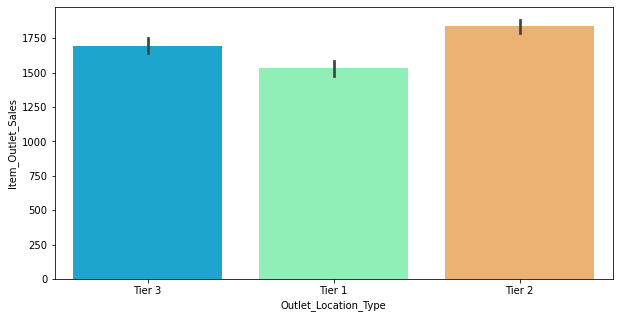

In [268]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df, palette='rainbow')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

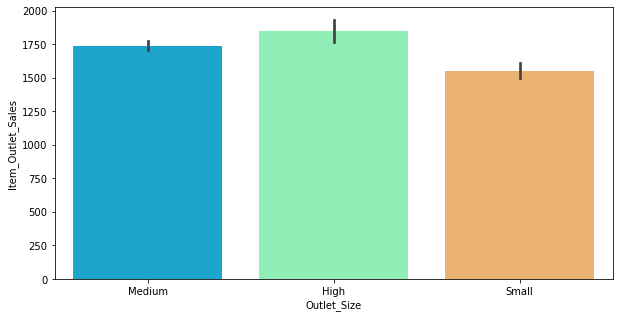

In [269]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df, palette='rainbow')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

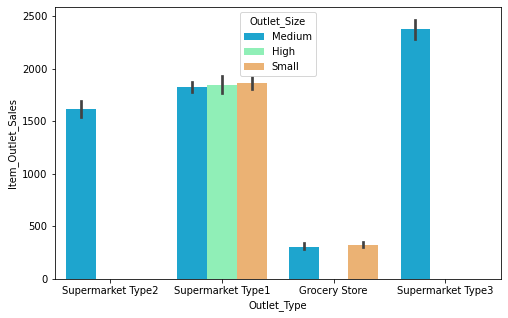

In [270]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df, palette='rainbow', hue='Outlet_Size')

## Multivariate analysis

<AxesSubplot:>

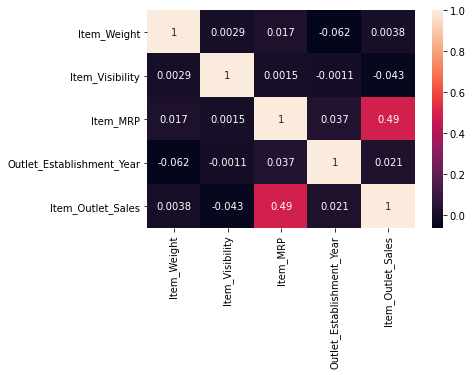

In [271]:
sns.heatmap(df.corr(),annot = True)

# Encoding, Feature engineering and ML part

Label Encoding

In [310]:
encode1= preprocessing.LabelEncoder()

In [311]:
df['Item_Identifier'] = encode1.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encode1.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encode1.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encode1.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encode1.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encode1.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encode1.fit_transform(df['Outlet_Type'])

In [274]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,8,5.92,1,0.02,14,48.27,3,2009,1,2,2,443.42
2,535,17.50,0,0.02,10,141.62,9,1999,1,0,1,"2,097.27"
3,890,19.20,1,0.00,6,182.09,0,1998,1,2,0,732.38
4,1029,8.93,0,0.00,9,53.86,1,1987,0,2,1,994.71
5,611,10.39,1,0.00,0,51.40,3,2009,1,2,2,556.61


In [312]:
X = df.drop(columns=['Item_Outlet_Sales','Outlet_Establishment_Year'], axis=1)
Y = df['Item_Outlet_Sales']

In [313]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [314]:
print(X.shape)

(5432, 10)


In [315]:
print(X_train.shape)

(3802, 10)


In [316]:
print(X_test.shape)

(1630, 10)


XGB

In [317]:
regressor = XGBRegressor()

In [318]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [319]:
training_data_prediction = regressor.predict(X_train)

In [321]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(r2_train)

0.893807678063889


test

In [322]:
test_data_prediction = regressor.predict(X_test)

In [323]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [324]:
print(r2_test)

0.43059644215369797


Linear Regression

In [325]:
from sklearn.linear_model import LinearRegression

In [326]:
regressor = LinearRegression()

In [329]:
import statsmodels.api as sm

#adding a constant
X1 = sm.add_constant(X)

#performing the regression
result = sm.OLS(Y, X).fit()

# Result of statsmodels 
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              2713.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:33:22   Log-Likelihood:                         -44166.
No. Observations:                5432   AIC:                                  8.835e+04
Df Residuals:                    5422   BIC:                                  8.842e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

random Forest

In [330]:
from sklearn.datasets import make_regression
# define dataset
X, Y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# summarize the dataset
print(X.shape, Y.shape)

(1000, 20) (1000,)


In [333]:
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.364 (8.144)
